In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,5)

import seaborn as sns
plt.style.use('ggplot')
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [16]:
data_mhd = pd.read_excel('../data/MHD-prevalence-mental-disorders.xlsx')

In [17]:
data_mhd

,Entity,Code,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorder,Drug use disorders,Depression,Alcohol use disorder
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [18]:
# index for World 2017
world_2017_i = data_mhd[((data_mhd['Entity'] == 'World') & (data_mhd['Year'] == 2017))].index

In [19]:
data_mhd.iloc[world_2017_i, 3:]

,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorder,Drug use disorders,Depression,Alcohol use disorder
6383,0.254055,0.598083,0.211304,3.764811,0.941628,3.441087,1.396497


In [20]:
mhd_world = data_mhd.iloc[world_2017_i, 3:]
mhd_world

,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorder,Drug use disorders,Depression,Alcohol use disorder
6383,0.254055,0.598083,0.211304,3.764811,0.941628,3.441087,1.396497


<AxesSubplot:>

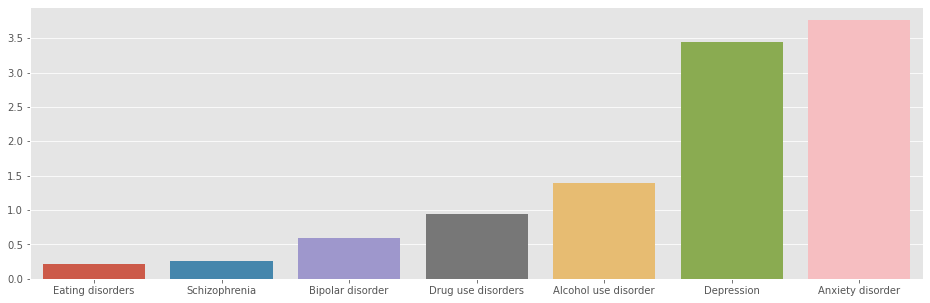

In [21]:
sns.barplot(data=mhd_world,
           order=['Eating disorders', 'Schizophrenia', 'Bipolar disorder', 'Drug use disorders', 'Alcohol use disorder', 'Depression', 'Anxiety disorder']
           )

In [22]:
# drop nans to eliminate the regions
data_mhd_countries = data_mhd.dropna()
data_mhd_countries = data_mhd_countries.drop(6383)

In [23]:
data_mhd_countries_2017 = data_mhd_countries[data_mhd_countries['Year']==2017]
data_mhd_countries_2017.sort_values('Depression', ascending=False, inplace=True)
data_mhd_countries_2017.head(10).Entity


2267        Greenland
3219          Lesotho
3863          Morocco
2743             Iran
5991           Uganda
6103    United States
2043          Finland
4395        Palestine
335         Australia
5571           Sweden
Name: Entity, dtype: object

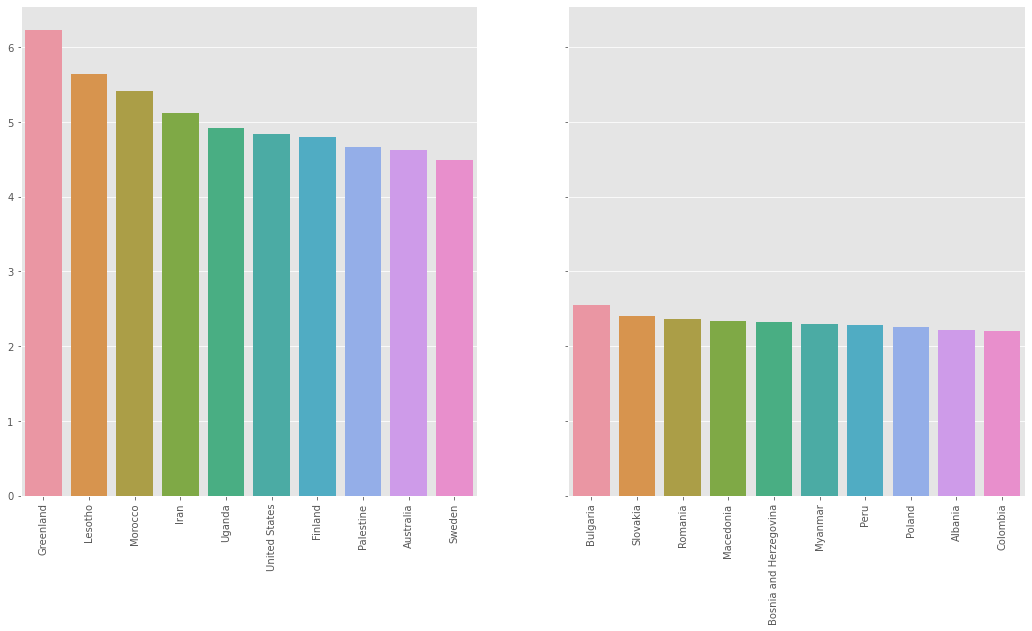

In [24]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 9))
sns.barplot(ax=axes[0],
            x='Entity',
            y='Depression',
            data=data_mhd_countries_2017.head(10))
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xticklabels(data_mhd_countries_2017.head(10).Entity, rotation = 90)

sns.barplot(ax=axes[1],
            x='Entity',
            y='Depression',
            data=data_mhd_countries_2017.tail(10))
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(data_mhd_countries_2017.tail(10).Entity, rotation = 90)

for ax in fig.get_axes():
    ax.label_outer()



# Mental Health by Regions

In [25]:
data_mhd_regions_2017 = data_mhd[((data_mhd['Code'].isna())&(data_mhd['Year']==2017))]
data_mhd_regions_2017

,Entity,Code,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorder,Drug use disorders,Depression,Alcohol use disorder
139,Andean Latin America,NaN,2017,0.201471,0.881737,0.355475,4.267738,0.661481,2.610385,1.533573
307,Australasia,NaN,2017,0.359991,1.151790,0.903106,6.884913,2.276766,4.524689,1.613586
1035,Caribbean,NaN,2017,0.193847,0.884517,0.259210,4.563041,0.733036,3.065059,1.662187
1091,Central Asia,NaN,2017,0.192411,0.672902,0.172627,2.572190,0.511943,2.969120,2.422853
1119,Central Europe,NaN,2017,0.205371,0.713509,0.217305,3.415223,0.677043,2.438713,2.021229
1147,"Central Europe, Eastern Europe, and Central Asia",NaN,2017,0.197898,0.686838,0.205557,2.983414,0.718708,3.243674,3.500378
1175,Central Latin America,NaN,2017,0.207671,0.795331,0.286315,2.960430,0.822284,2.697779,1.762195
1203,Central Sub-Saharan Africa,NaN,2017,0.161344,0.621204,0.117588,3.263217,0.521061,4.017925,1.360875
1707,East Asia,NaN,2017,0.335180,0.322460,0.159511,3.041394,1.107724,3.302017,1.237431
1735,Eastern Europe,NaN,2017,0.196570,0.680442,0.217029,2.943490,0.852237,3.802439,4.729860


In [28]:
data_mhd_regions_2017.drop([1147, 2491, 2519, 2547, 2575, 3331, 3359, 3751, 4143, 5319])
data_mhd_regions_2017

,Entity,Code,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorder,Drug use disorders,Depression,Alcohol use disorder
139,Andean Latin America,NaN,2017,0.201471,0.881737,0.355475,4.267738,0.661481,2.610385,1.533573
307,Australasia,NaN,2017,0.359991,1.151790,0.903106,6.884913,2.276766,4.524689,1.613586
1035,Caribbean,NaN,2017,0.193847,0.884517,0.259210,4.563041,0.733036,3.065059,1.662187
1091,Central Asia,NaN,2017,0.192411,0.672902,0.172627,2.572190,0.511943,2.969120,2.422853
1119,Central Europe,NaN,2017,0.205371,0.713509,0.217305,3.415223,0.677043,2.438713,2.021229
1147,"Central Europe, Eastern Europe, and Central Asia",NaN,2017,0.197898,0.686838,0.205557,2.983414,0.718708,3.243674,3.500378
1175,Central Latin America,NaN,2017,0.207671,0.795331,0.286315,2.960430,0.822284,2.697779,1.762195
1203,Central Sub-Saharan Africa,NaN,2017,0.161344,0.621204,0.117588,3.263217,0.521061,4.017925,1.360875
1707,East Asia,NaN,2017,0.335180,0.322460,0.159511,3.041394,1.107724,3.302017,1.237431
1735,Eastern Europe,NaN,2017,0.196570,0.680442,0.217029,2.943490,0.852237,3.802439,4.729860


# Disorders by SDI index

In [13]:
data_mhd.head(2)

,Entity,Code,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorder,Drug use disorders,Depression,Alcohol use disorder
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.82974,1.684746,4.079531,0.671768


In [14]:
mhd_regions_sdi = mhd_regions[((mhd_regions['Entity']=='High SDI')|(mhd_regions['Entity']=='Middle SDI')|(mhd_regions['Entity']=='Low SDI'))]
mhd_regions_sdi

NameError: name 'mhd_regions' is not defined

SDI: A summary measure that identifies where countries or other geographic areas sit on the spectrum of development. Expressed on a scale of 0 to 1, SDI is a composite average of the rankings of the incomes per capita, average educational attainment, and fertility rates of all areas in the GBD study.

In [ ]:
mhd_regions_sdi.drop(['Code', 'Year'], axis=1, inplace=True)

In [ ]:
mhd_regions_sdi

In [ ]:
fig, axes = plt.subplots(1, 7, sharey=True, figsize=(16, 7))

sns.barplot(ax=axes[1], data=mhd_regions_sdi, x='Entity', y='Schizophrenia', order=['High SDI', 'Middle SDI', 'Low SDI'])
axes[1].set_title('Schizophrenia')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

sns.barplot(ax=axes[2], data=mhd_regions_sdi, x='Entity', y='Bipolar disorder')
axes[2].set_title('Bipolar dis.')
axes[2].set_xlabel('')
axes[2].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

sns.barplot(ax=axes[0], data=mhd_regions_sdi, x='Entity', y='Eating disorders')
axes[0].set_title('Eating dis.')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

sns.barplot(ax=axes[6], data=mhd_regions_sdi, x='Entity', y='Anxiety disorder')
axes[6].set_title('Anxiety dis.')
axes[6].set_xlabel('')
axes[6].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

sns.barplot(ax=axes[3], data=mhd_regions_sdi, x='Entity', y='Drug use disorders')
axes[3].set_title('Drug use dis.')
axes[3].set_xlabel('')
axes[3].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

sns.barplot(ax=axes[5], data=mhd_regions_sdi, x='Entity', y='Depression')
axes[5].set_title('Depression dis.')
axes[5].set_xlabel('')
axes[5].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

sns.barplot(ax=axes[4], data=mhd_regions_sdi, x='Entity', y='Alcohol use disorder')
axes[4].set_title('Alcohol use dis.')
axes[4].set_xlabel('')
axes[4].set_xticklabels(['High SDI', 'Middle SDI', 'Low SDI'], rotation = 90)

for ax in fig.get_axes():
    ax.label_outer()

# Prevalence of depression by gender

In [30]:
mhd_gender = pd.read_excel('../data/MHD-depression-by-gender.xlsx')
mhd_gender

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0
...,...,...,...,...,...,...
47802,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.0
47803,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.0
47804,Zimbabwe,ZWE,2017,2.812022,3.500860,14237000.0
47805,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [31]:
# drop nans
mhd_gender_countries = mhd_gender.dropna()
mhd_gender_countries

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
190,Afghanistan,AFG,1990,3.499982,4.647815,12412000.0
191,Afghanistan,AFG,1991,3.503947,4.655772,13299000.0
192,Afghanistan,AFG,1992,3.508912,4.662066,14486000.0
193,Afghanistan,AFG,1993,3.513429,4.669012,15817000.0
194,Afghanistan,AFG,1994,3.515578,4.673050,17076000.0
...,...,...,...,...,...,...
47800,Zimbabwe,ZWE,2013,2.769193,3.424106,13350000.0
47801,Zimbabwe,ZWE,2014,2.778101,3.437674,13587000.0
47802,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.0
47803,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.0


In [32]:
# filter by year
mhd_gender_2017 = mhd_gender_countries[(mhd_gender_countries['Year'] == 2017)]
mhd_gender_2017

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
217,Afghanistan,AFG,2017,3.575763,4.690483,3.629600e+07
559,Albania,ALB,2017,1.648928,2.746625,2.884000e+06
779,Algeria,DZA,2017,2.970712,4.346823,4.138900e+07
849,American Samoa,ASM,2017,2.452346,3.405167,5.600000e+04
1097,Andorra,AND,2017,2.782520,4.704401,7.700000e+04
...,...,...,...,...,...,...
46769,Vietnam,VNM,2017,2.138027,3.545613,9.460100e+07
47144,World,OWID_WRL,2017,2.730133,4.124307,7.547859e+09
47364,Yemen,YEM,2017,3.277145,4.739279,2.783500e+07
47584,Zambia,ZMB,2017,3.277384,3.985017,1.685400e+07


In [33]:
print(mhd_gender_2017[mhd_gender_2017['Entity']=="Spain"])
print(mhd_gender_2017[mhd_gender_2017['Entity']=="Netherlands"])
print(mhd_gender_2017[mhd_gender_2017['Entity']=="United States"])
print(mhd_gender_2017[mhd_gender_2017['Entity']=="China"])
print(mhd_gender_2017[mhd_gender_2017['Entity']=="India"])


      Entity Code  Year  Prevalence in males (%)  Prevalence in females (%)  \
39903  Spain  ESP  2017                 2.394718                   4.638084   

       Population  
39903  46647000.0  
            Entity Code  Year  Prevalence in males (%)  \
29715  Netherlands  NLD  2017                 2.868116   

       Prevalence in females (%)  Population  
29715                    5.14328  17021000.0  
              Entity Code  Year  Prevalence in males (%)  \
45379  United States  USA  2017                 3.534154   

       Prevalence in females (%)   Population  
45379                   6.090078  325084992.0  
     Entity Code  Year  Prevalence in males (%)  Prevalence in females (%)  \
8945  China  CHN  2017                 2.565868                   4.042118   

        Population  
8945  1.421022e+09  
      Entity Code  Year  Prevalence in males (%)  Prevalence in females (%)  \
19011  India  IND  2017                 2.965418                   4.091875   

         Popula

Text(2.97, 4.09, 'IND')

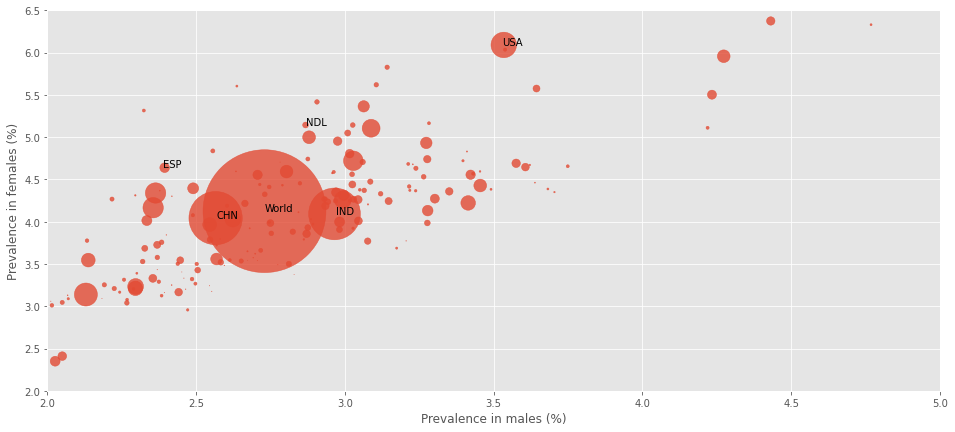

In [78]:


f, ax = plt.subplots(figsize=(16, 7))

ax.set(xlim=(2, 5), ylim=(2, 6.5))

plt.scatter(y=mhd_gender_2017['Prevalence in females (%)'],
                x=mhd_gender_2017['Prevalence in males (%)'],
                s=mhd_gender_2017['Population']*0.000002,
                alpha=0.8)
plt.ylabel('Prevalence in females (%)')
plt.xlabel('Prevalence in males (%)')
plt.text(2.73, 4.12, 'World')
plt.text(2.39, 4.64, 'ESP')
plt.text(2.87, 5.14, 'NDL')
plt.text(3.53, 6.09, 'USA')
plt.text(2.57, 4.04, 'CHN')
plt.text(2.97, 4.09, 'IND')

# Prevelance of depression by gender (regions)

In [35]:
mhd_gender_regions = mhd_gender[((mhd_gender['Code'].isna())&(mhd_gender['Year']==2017))]
mhd_gender_regions

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
339,Africa,NaN,2017,NaN,NaN,1.244222e+09
879,Andean Latin America,NaN,2017,2.124946,3.076537,NaN
2239,Asia,NaN,2017,NaN,NaN,4.519040e+09
2269,Australasia,NaN,2017,3.581019,5.435862,NaN
7787,Caribbean,NaN,2017,2.495773,3.602841,NaN
8105,Central Asia,NaN,2017,2.419069,3.420413,NaN
8133,Central Europe,NaN,2017,2.062009,2.765261,NaN
8161,"Central Europe, Eastern Europe, and Central Asia",NaN,2017,2.651206,3.718995,NaN
8189,Central Latin America,NaN,2017,2.276298,3.079335,NaN
8217,Central Sub-Saharan Africa,NaN,2017,3.503807,4.494781,NaN


In [59]:
mhd_gender_regions.dropna(subset=['Prevalence in males (%)', 'Prevalence in females (%)'])

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
879,Andean Latin America,NaN,2017,2.124946,3.076537,NaN
2269,Australasia,NaN,2017,3.581019,5.435862,NaN
7787,Caribbean,NaN,2017,2.495773,3.602841,NaN
8105,Central Asia,NaN,2017,2.419069,3.420413,NaN
8133,Central Europe,NaN,2017,2.062009,2.765261,NaN
8161,"Central Europe, Eastern Europe, and Central Asia",NaN,2017,2.651206,3.718995,NaN
8189,Central Latin America,NaN,2017,2.276298,3.079335,NaN
8217,Central Sub-Saharan Africa,NaN,2017,3.503807,4.494781,NaN
12195,East Asia,NaN,2017,2.560342,4.027178,NaN
12223,Eastern Europe,NaN,2017,3.098516,4.342516,NaN


In [60]:
mhd_gender_regions_clean = mhd_gender_regions.drop(['Code', 'Year', 'Population'], axis=1)

In [61]:
mhd_gender_regions_clean = mhd_gender_regions_clean.drop([8161, 17829,17857,17885,17913,22533,24101,24129,27227,39629]).dropna()

In [62]:
mhd_gender_regions_clean

,Entity,Prevalence in males (%),Prevalence in females (%)
879,Andean Latin America,2.124946,3.076537
2269,Australasia,3.581019,5.435862
7787,Caribbean,2.495773,3.602841
8105,Central Asia,2.419069,3.420413
8133,Central Europe,2.062009,2.765261
8189,Central Latin America,2.276298,3.079335
8217,Central Sub-Saharan Africa,3.503807,4.494781
12195,East Asia,2.560342,4.027178
12223,Eastern Europe,3.098516,4.342516
12251,Eastern Sub-Saharan Africa,3.268050,4.343038


In [63]:
mhd_gender_regions_clean['World Zone']=['South America', 'Australia', 'Central America', 'Asia', 'Europe', 'Central America', 'Africa', 'Asia', 'Europe', 'Africa', 'Europe', 'Africa', 'North America', 'Europe', 'Australia', 'Europe', 'Asia', 'Asia', 'South America', 'Africa', 'Africa', 'Central America', 'Europe', 'Europe', 'Africa']

In [70]:
mhd_gender_regions_clean

,Entity,Prevalence in males (%),Prevalence in females (%),World Zone
879,Andean Latin America,2.124946,3.076537,South America
2269,Australasia,3.581019,5.435862,Australia
7787,Caribbean,2.495773,3.602841,Central America
8105,Central Asia,2.419069,3.420413,Asia
8133,Central Europe,2.062009,2.765261,Europe
8189,Central Latin America,2.276298,3.079335,Central America
8217,Central Sub-Saharan Africa,3.503807,4.494781,Africa
12195,East Asia,2.560342,4.027178,Asia
12223,Eastern Europe,3.098516,4.342516,Europe
12251,Eastern Sub-Saharan Africa,3.268050,4.343038,Africa


['Andean Latin America',
 'Australasia',
 'Caribbean',
 'Central Asia',
 'Central Europe',
 'Central Latin America',
 'Central Sub-Saharan Africa',
 'East Asia',
 'Eastern Europe',
 'Eastern Sub-Saharan Africa',
 'England',
 'North Africa and Middle East',
 'North America',
 'Northern Ireland',
 'Oceania',
 'Scotland',
 'South Asia',
 'Southeast Asia',
 'Southern Latin America',
 'Southern Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Tropical Latin America',
 'Wales',
 'Western Europe',
 'Western Sub-Saharan Africa']

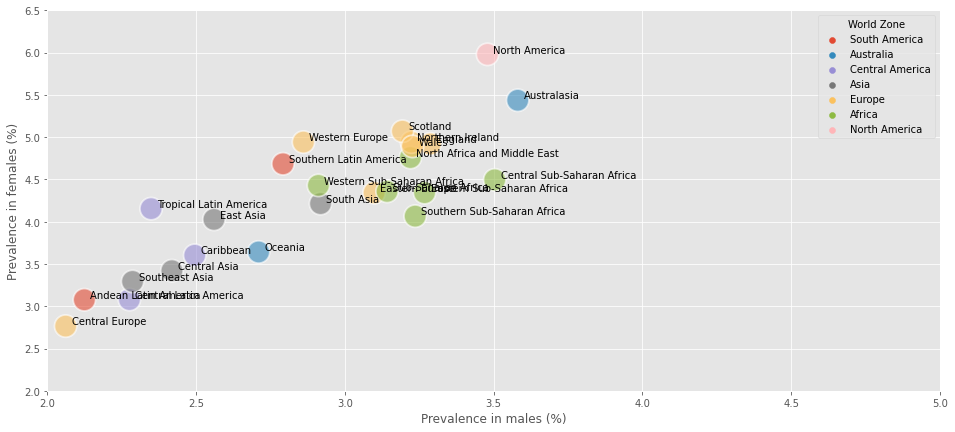

In [77]:
f, ax = plt.subplots(figsize=(16, 7))

ax.set(xlim=(2, 5), ylim=(2, 6.5))

sns.scatterplot(y=mhd_gender_regions_clean['Prevalence in females (%)'],
                x=mhd_gender_regions_clean['Prevalence in males (%)'],
                hue=mhd_gender_regions_clean['World Zone'],
                s=500,
                alpha=0.6)
plt.ylabel('Prevalence in females (%)')
plt.xlabel('Prevalence in males (%)')


texts = mhd_gender_regions_clean['Entity'].tolist()
x_males = mhd_gender_regions_clean['Prevalence in males (%)'].tolist()
y_females = mhd_gender_regions_clean['Prevalence in females (%)'].tolist()

for i, texts in enumerate (texts):
    plt.text(x_males[i]+0.02, y_females[i]+0.02, texts)

# Prevalence of depression by age

In [ ]:
mhd_age = pd.read_excel('../data/MHD-depression-by-age.xlsx')
mhd_age

In [ ]:
# drop nans
mhd_age_clean = mhd_age.dropna()
mhd_age_clean

In [ ]:
# Select World data from 2017 and clean columns

mhd_age_world = mhd_age_clean[(data_mhd['Entity'] == 'World') & (data_mhd['Year'] == 2017)]

In [ ]:
mhd_age_world.drop(['Code', 'Year', 'All ages (%)'], axis=1, inplace=True)
mhd_age_world

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

sns.barplot(data=mhd_age_world)


# Depression and suicide

In [ ]:
mhd_suicide = pd.read_excel('../data/MHD-suicide-rates.xlsx')
mhd_suicide

In [ ]:
# drop nans
mhd_suicide_countries = mhd_suicide.dropna()
mhd_suicide_countries

In [ ]:
mhd_suicide_countries_2017 = mhd_suicide_countries[(mhd_suicide_countries['Year'] == 2017)]
mhd_suicide_countries_2017

In [ ]:
f, ax = plt.subplots(figsize=(16, 7))

#ax.set(xlim=(2, 6), ylim=(2, 6))

plt.scatter(y=mhd_suicide_countries_2017['Suicide rate (deaths per 100,000 individuals)'],
                x=mhd_suicide_countries_2017['Depressive disorder rates (number suffering per 100,000)'],
                s=mhd_suicide_countries_2017['Population']*0.000002,
                alpha=0.8)
plt.ylabel('Suicide rate (deaths per 100,000 individuals)')
plt.xlabel('Depressive disorder rates (number suffering per 100,000)')
plt.title('World Prevalence of depression by gender, 2017')
#plt.text(2.73, 4.12, 'World')

In [ ]:


f, ax = plt.subplots(figsize=(16, 7))

#ax.set(xlim=(2, 6), ylim=(2, 6))


sns.regplot(x=mhd_suicide_countries_2017['Depressive disorder rates (number suffering per 100,000)'],
            y=mhd_suicide_countries_2017['Suicide rate (deaths per 100,000 individuals)'],
            fit_reg=True
)

plt.ylabel('Suicide rate (deaths per 100,000 individuals)')
plt.xlabel('Depressive disorder rates (number suffering per 100,000)')

